# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
#your turn
df=df_transactions.merge(df_offers)
df.head()

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,January,Pinot Noir,72,17,France,False
2,Martin,2,1,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,January,Pinot Noir,72,17,France,False


In [5]:
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
matrix = matrix.fillna(0).reset_index()
matrix

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [ ]:
# your turn
#Q1: The smaller value of SS, the better clustering. Because xi is the point, and Uk is the cnetroid for cluster, (xi-uk) the
#samller, the better. While there is a blance between SS and k, as SS decreases, k increases which cause overfitting.

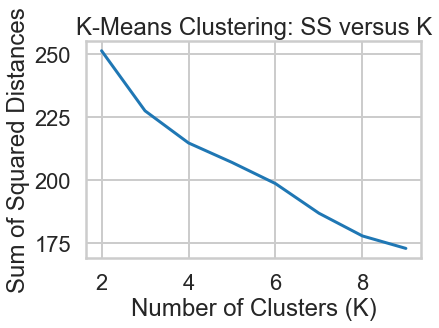

In [6]:
from sklearn.cluster import KMeans

x_cols = matrix.drop(['customer_name'],axis=1)
ss=[]
ks=range(2,10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_cols)
    ss.append(kmeans.inertia_)


plt.plot(ks,ss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('K-Means Clustering: SS versus K')
plt.show()

Text(0, 0.5, 'size')

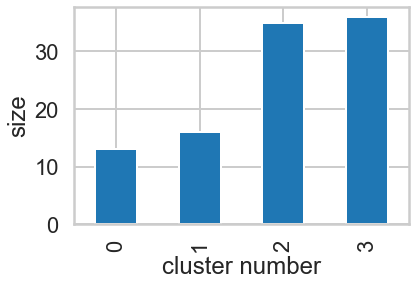

In [7]:
#The elbow point chosen here is 4
cluster = KMeans(n_clusters=4, random_state=0).fit(x_cols)
matrix['cluster'] = cluster.predict(x_cols)

matrix['cluster'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('cluster number')
plt.ylabel('size')

In [59]:
#A:The sum of squared distances appears to diminish at a constant slope as the number of clusters increases, which is difficult
#to find out the elbow point where the rate of change slows down.

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.09174871508750351


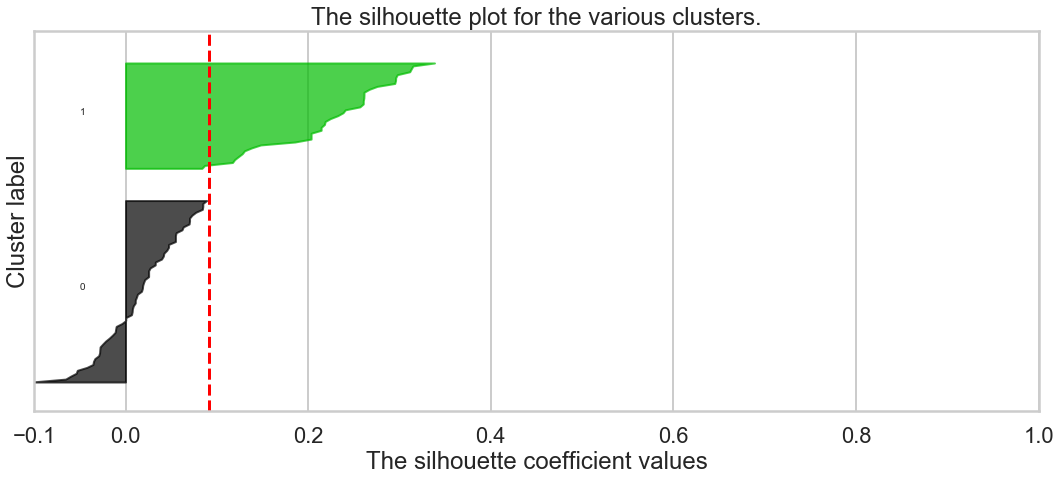

For n_clusters = 3 The average silhouette_score is : 0.12101628521627421


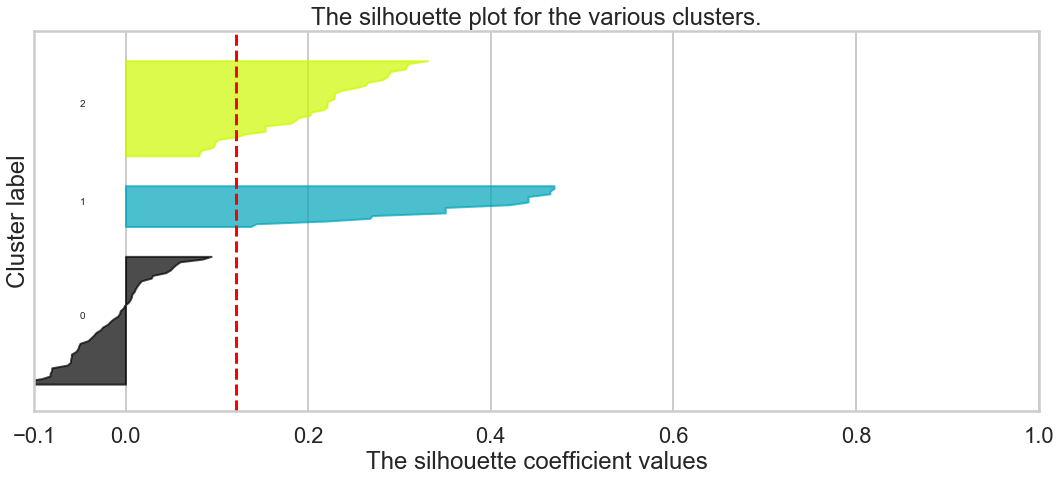

For n_clusters = 4 The average silhouette_score is : 0.13421536289944658


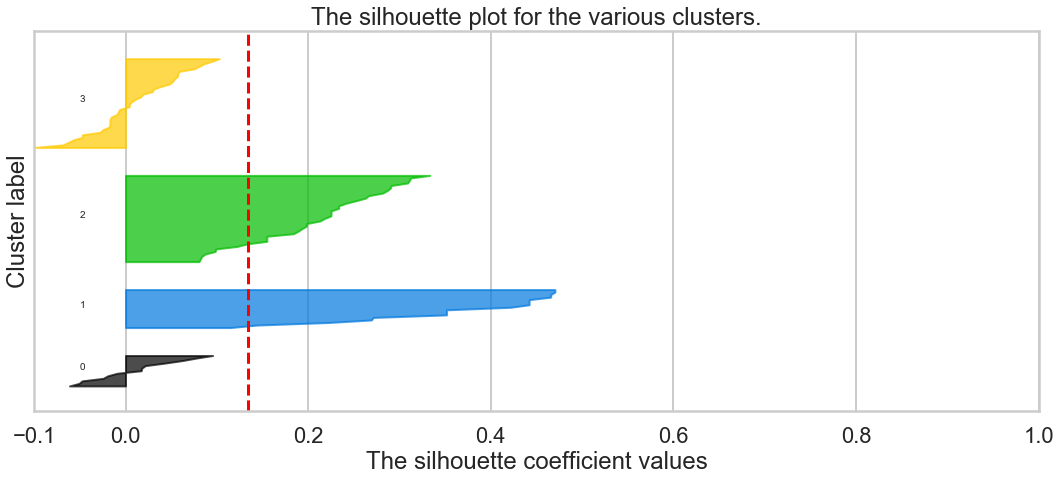

For n_clusters = 5 The average silhouette_score is : 0.11749792889789946


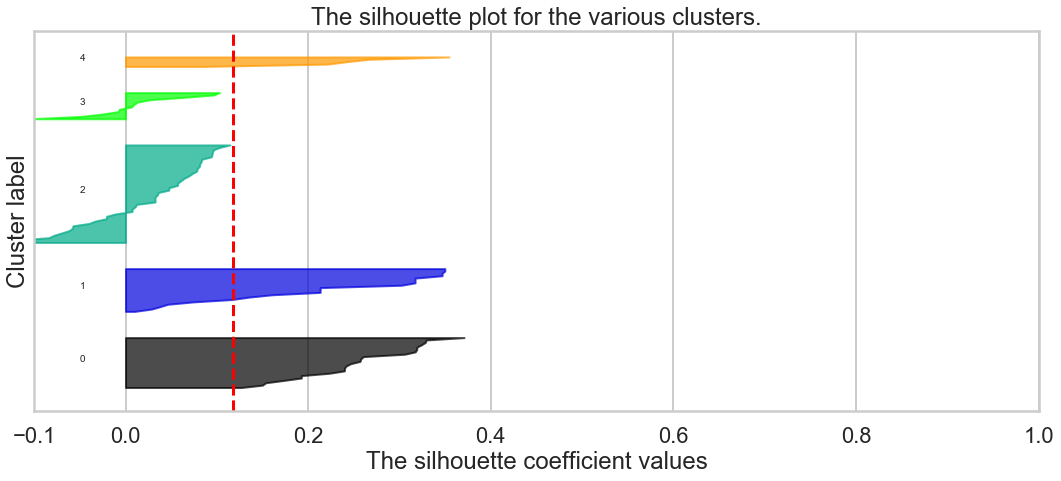

For n_clusters = 6 The average silhouette_score is : 0.11001951281555851


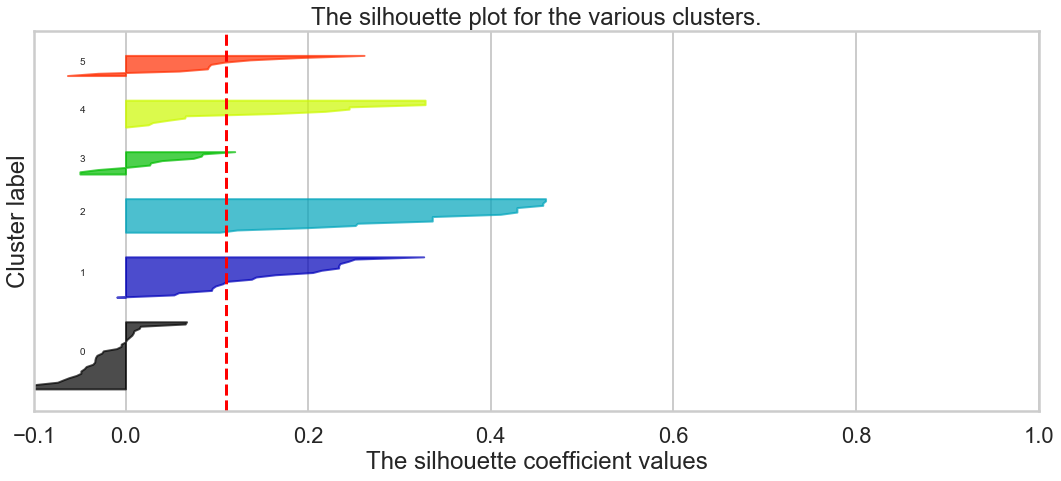

For n_clusters = 7 The average silhouette_score is : 0.1389060957347788


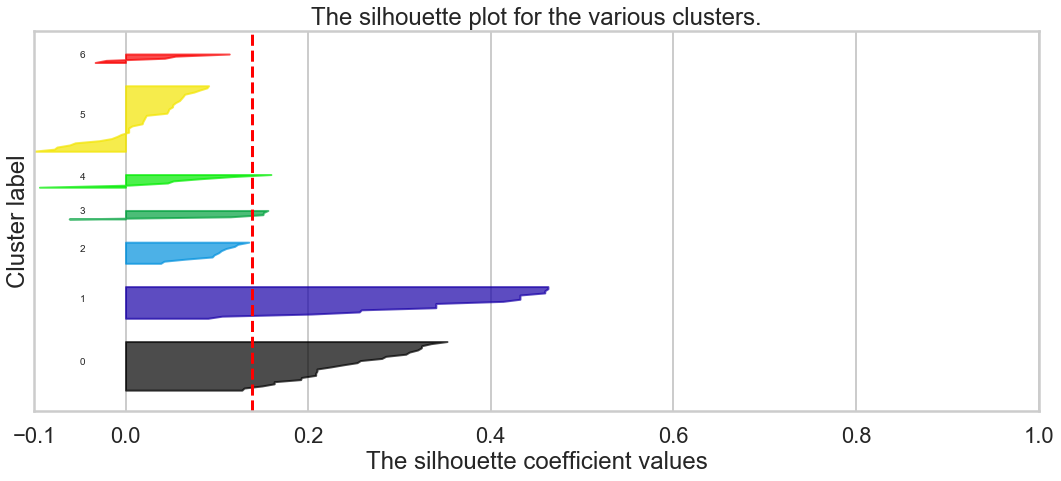

For n_clusters = 8 The average silhouette_score is : 0.10969644130551678


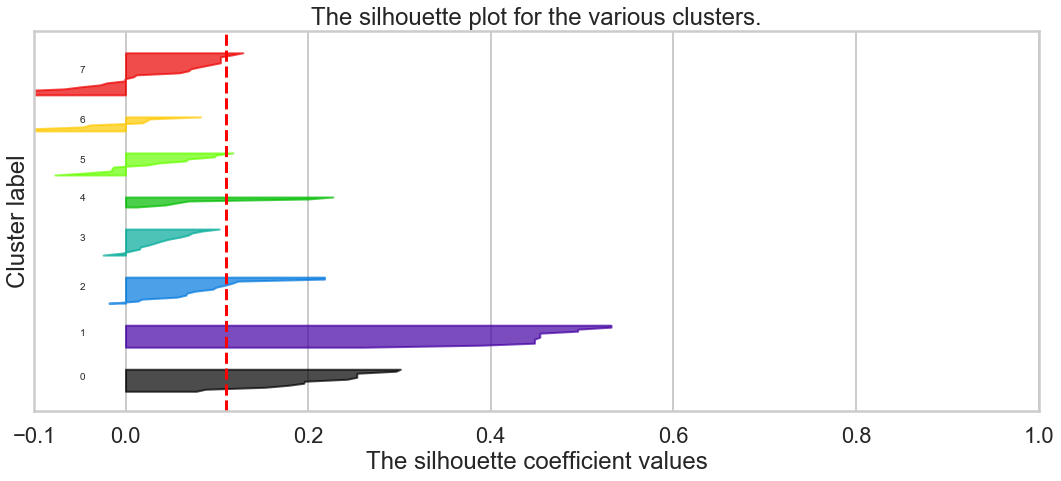

For n_clusters = 9 The average silhouette_score is : 0.12267242922234355


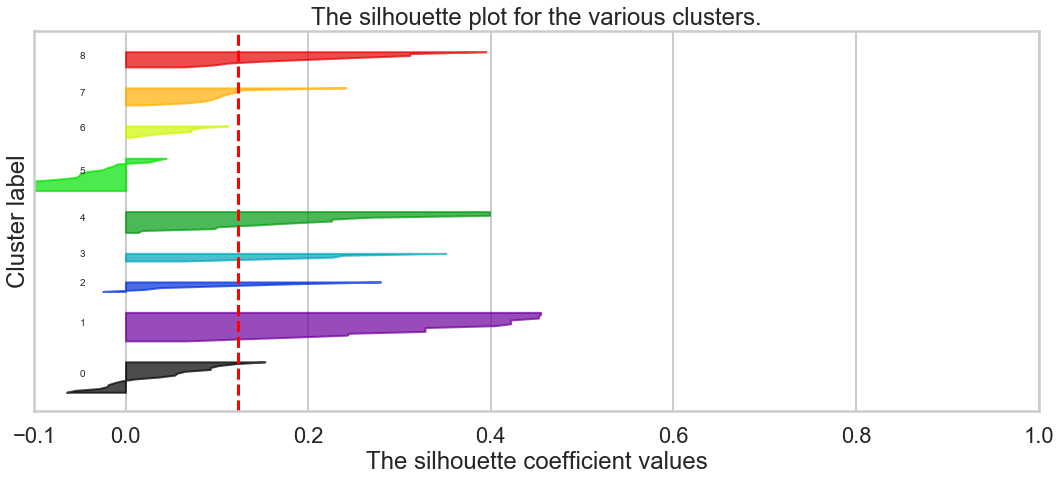

For n_clusters = 10 The average silhouette_score is : 0.12728046874135684


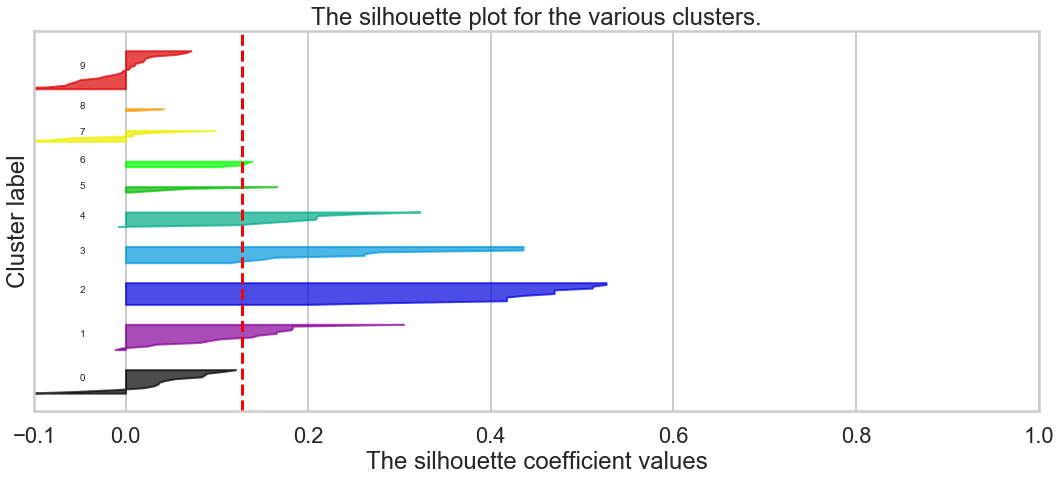

In [8]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

k_list = range(2,11)
silhouette = []

for k in k_list:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_cols) + (k+1) * 10])
    
    clf = KMeans(n_clusters = k, random_state=0)
    labels = clf.fit_predict(x_cols)
    
    silhouette_avg = silhouette_score(x_cols, labels)
    print('For n_clusters =', k,'The average silhouette_score is :', silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(x_cols, labels)
    silhouette.append(silhouette_avg)
    
    y_lower = 10
    
    for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i)/k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            y_lower = y_upper + 10
            
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

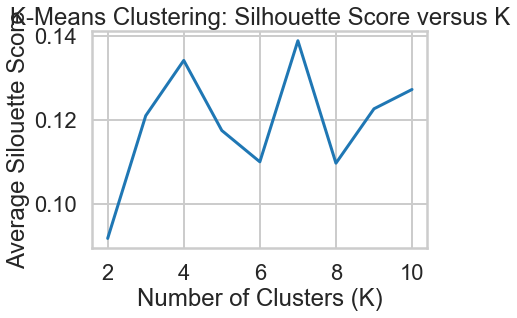

In [9]:
# Plot Silhouette Scores against K number of clusters
plt.plot(range(2,11), silhouette)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silouette Score')
plt.title('K-Means Clustering: Silhouette Score versus K')
plt.show()

In [49]:
#The highest silhouette scores is around 0.14, when n_clusters is 4. But still indicating there is no clear sturcture of pattern
#in the data.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

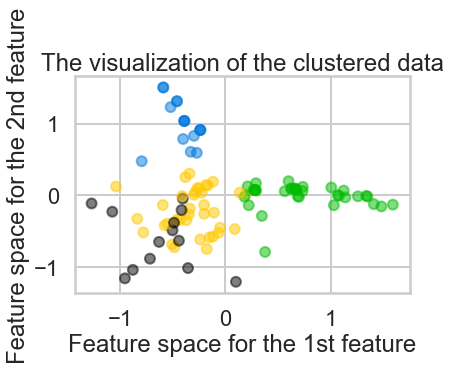

In [10]:
#your turn
from sklearn.decomposition import PCA

model=PCA(n_components=2,random_state=0)
matrix['x'] = model.fit_transform(x_cols)[:,0]
matrix['y'] = model.fit_transform(x_cols)[:,1]

colors = cm.nipy_spectral(matrix.cluster.astype(float) / 4)
plt.scatter(matrix.x, matrix.y, marker='o', s=100, alpha=0.5, c=colors)
plt.title("The visualization of the clustered data")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()

In [57]:
# Noticing two clusters, black and yellow, have some overlapping and are generally weak in both principal components. The green 
#cluster is distinctively higher in the first principal component than other clusters, and the blue cluster is clearly stronger
#in the second principal component. Based on the this graph, three clusters might be sufficient.

In [11]:
# Group transactions data by clusters to see the frequency of purchase for each offer
df_clusters = matrix.groupby('cluster').mean()
df_clusters = df_clusters.stack().unstack('cluster').reset_index()

In [12]:
# Merge clustered data with offer details and show cluster's tendency to purchase each offer
df = pd.merge(df_clusters, df_offers, how='left', on='offer_id')
df[df[0]>0.33].fillna('')

,offer_id,0,1,2,3,campaign,varietal,min_qty,discount,origin,past_peak
3,4,0.538462,0.0,0.000000,0.138889,February,Champagne,72.0,48.0,France,True
5,6,0.846154,0.0,0.028571,0.000000,March,Prosecco,144.0,86.0,Chile,False
21,22,0.538462,0.0,0.028571,0.361111,August,Champagne,72.0,63.0,France,False
30,31,0.384615,0.0,0.000000,0.333333,December,Champagne,72.0,89.0,France,False


In [13]:
# Merge clustered data with offer details and show cluster's tendency to purchase each offer
df = pd.merge(df_clusters, df_offers, how='left', on='offer_id')
df[df[1]>0.33].fillna('')

,offer_id,0,1,2,3,campaign,varietal,min_qty,discount,origin,past_peak
1,2,0.000000,0.37500,0.000000,0.111111,January,Pinot Noir,72,17,France,False
16,17,0.000000,0.43750,0.000000,0.000000,July,Pinot Noir,12,47,Germany,False
23,24,0.000000,0.75000,0.000000,0.000000,September,Pinot Noir,6,34,Italy,False
25,26,0.153846,0.75000,0.000000,0.027778,October,Pinot Noir,144,83,Australia,False
33,y,-0.620522,1.00094,-0.003106,-0.217765,,,,,,


In [14]:
# Merge clustered data with offer details and show cluster's tendency to purchase each offer
df = pd.merge(df_clusters, df_offers, how='left', on='offer_id')
df[df[2]>0.33].fillna('')

,offer_id,0,1,2,3,campaign,varietal,min_qty,discount,origin,past_peak
6,7,0.153846,0.000000,0.457143,0.027778,March,Prosecco,6,40,Australia,True
7,8,0.076923,0.000000,0.485714,0.055556,March,Espumante,6,45,South Africa,False
17,18,0.000000,0.000000,0.371429,0.027778,July,Espumante,6,50,Oregon,False
28,29,0.000000,0.000000,0.457143,0.027778,November,Pinot Grigio,6,87,France,False
29,30,0.000000,0.000000,0.457143,0.166667,December,Malbec,6,54,France,False
32,x,-0.620072,-0.414356,0.739224,-0.310617,,,,,,


In [15]:
# Merge clustered data with offer details and show cluster's tendency to purchase each offer
df = pd.merge(df_clusters, df_offers, how='left', on='offer_id')
df[df[3]>0.33].fillna('')

,offer_id,0,1,2,3,campaign,varietal,min_qty,discount,origin,past_peak
10,11,0.076923,0.0,0.000000,0.333333,May,Champagne,72.0,85.0,France,False
21,22,0.538462,0.0,0.028571,0.361111,August,Champagne,72.0,63.0,France,False
30,31,0.384615,0.0,0.000000,0.333333,December,Champagne,72.0,89.0,France,False


In [39]:
#Summary: Our clustering results show that customers can be grouped primarily based on wine varitals and the offer's minimum 
#quantity of purchase. Customers in cluster 0 tend to purchase Prosecco and Champagne and buy them in bulk. Cluster 1 seem to 
#favor Pinot Noir regardless of the origin of wine or the minimum purchase quantity for the special offer. The offers that 
#Cluster 2 favor tend to require a small minimun quantity, and the offers could be for different wine varietals, such as 
#Prosecco, Espumante, Pinot Grigio, and Malbec. Cluster 3 seem to overlap with cluster 0 in their tendency to choose Champagne 
#offers. Thus, different customers are likely to respond to not only offers that feature their favorite wine but also offers 
#that require a large or small package.

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [16]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

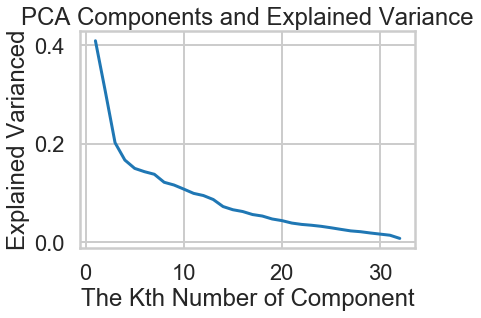

In [17]:
# Plot the explained variance by each component
plt.plot(range(1,33), pca.explained_variance_)
plt.xlabel('The Kth Number of Component')
plt.ylabel('Explained Varianced')
plt.title('PCA Components and Explained Variance')
plt.show()

In [70]:
#Result: This plot shows that the amount of variance explained by a component falls for each successive component and the rate 
#of descent slows sharply after the third or fourth component. Thus, setting the number of components to be three or four seems 
#to be a good choice.

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


# Affinity Propagation
·Parameters = Damping, sample preference

·Scalability = Not scalable with n_samples

·Use Case = Many clusters, uneven cluster size, non-flat geometry

·Geometry (metric used) = Graph distance (e.g. nearest-neighbor graph)

AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.

Affinity Propagation can be interesting as it chooses the number of clusters based on the data provided. For this purpose, the two important parameters are the preference, which controls how many exemplars are used, and the damping factor which damps the responsibility and availability messages to avoid numerical oscillations when updating these messages.

The main drawback of Affinity Propagation is its complexity. The algorithm has a time complexity of the order , where is the number of samples and is the number of iterations until convergence. Further, the memory complexity is of the order if a dense similarity matrix is used, but reducible if a sparse similarity matrix is used. This makes Affinity Propagation most appropriate for small to medium sized datasets.

In [36]:
# Use Affinity Propagation on x_cols

from sklearn.cluster import AffinityPropagation

# Damping factor (between 0.5 and 1) is the extent to which the current value is 
# maintained relative to incoming values (weighted 1 - damping). 
# This in order to avoid numerical oscillations when updating these values (messages).
ls_damp = [x/100 for x in range(50, 100, 5)]

# record damping value and score
ls_ap = []

for d in ls_damp:
    ap = AffinityPropagation(damping=d)
    labels = ap.fit_predict(x_cols)
    score = silhouette_score(x_cols, labels, random_state=1)
    ls_ap.append([d, score])

df_ap = pd.DataFrame(ls_ap, columns=['damping', 'score'])    
df_ap

,damping,score
0,0.50,0.123465
1,0.55,0.123465
2,0.60,0.123465
3,0.65,0.123465
4,0.70,0.123465
5,0.75,0.123465
6,0.80,0.089546
7,0.85,0.089546
8,0.90,0.089546
9,0.95,0.089546


Best Damping: 0.5
Best Score: 0.12346523604478911


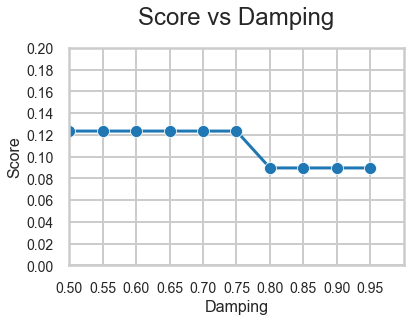

In [37]:
# find highest score, the damping value
# plot the scores vs damping value

print('Best Damping:', df_ap.damping.loc[df_ap.score.idxmax])
print('Best Score:', df_ap.score.max())

# plot the explained variance vs # of dimensions
_ = sns.lineplot(x='damping', 
                 y='score', 
                 data=df_ap, 
                 marker='o')

_ = plt.title('Score vs Damping', y=1.08)
_ = plt.xlabel('Damping', fontsize=16)
_ = plt.ylabel('Score', fontsize=16)
_ = plt.xlim([0.5,1])
_ = plt.ylim([0.0,0.2])
_ = plt.xticks([x/100 for x in range(50, 100, 5)], fontsize = 14)
_ = plt.yticks([.0, .02, .04, .06, .08, .10, .12, .14, .16, .18, .20], fontsize = 14)


# Spectral Clustering
* Parameters = Number of clusters	
* Scalability = Medium n_samples, small n_clusters	
* Use Case = Few clusters, even cluster size, non-flat geometry	
* Geometry (metric used) = Graph distance (e.g. nearest-neighbor graph)

Apply clustering to a projection to the normalized laplacian. In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plan.

In [29]:
# Your turn
# Affinity propagation
# Use Spectral Clustering on x_cols

from sklearn.cluster import SpectralClustering

# range of potential number of clusters
ls_clust = [x for x in range(2, 11, 1)]

# record number of clusters and score
ls_sc = []

for c in ls_clust:
    sc = SpectralClustering(n_clusters=c)
    labels = sc.fit_predict(x_cols)
    score = silhouette_score(x_cols, labels, random_state=1)
    ls_sc.append([c, score])

df_sc = pd.DataFrame(ls_sc, columns=['clusters', 'score'])    
df_sc

,clusters,score
0,2,0.076319
1,3,0.106115
2,4,0.086279
3,5,0.095379
4,6,0.105047
5,7,0.079954
6,8,0.098341
7,9,0.093675
8,10,0.092494


Best Clusters: 3
Best Score: 0.10611539040197304


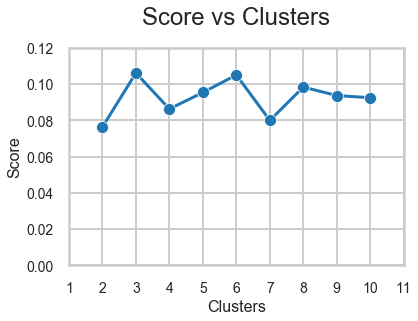

In [30]:
# find highest score, the number of clusters
# plot the scores vs # of clusters

print('Best Clusters:', df_sc.clusters.loc[df_sc.score.idxmax])
print('Best Score:', df_sc.score.max())

# plot the explained variance vs # of dimensions
_ = sns.lineplot(x='clusters', 
                 y='score', 
                 data=df_sc, 
                 marker='o')

_ = plt.title('Score vs Clusters', y=1.08)
_ = plt.xlabel('Clusters', fontsize=16)
_ = plt.ylabel('Score', fontsize=16)
_ = plt.xlim([1, 11])
_ = plt.ylim([0.0,0.12])
_ = plt.xticks([x for x in range(1, 12, 1)], fontsize = 14)
_ = plt.yticks([.0, .02, .04, .06, .08, .10, .12], fontsize = 14)

# Agglomerative Clustering
Parameters = Number of clusters, linkage type, distance
Scalability = Large n_samples and n_clusters
Use Case = Many clusters, possibly connectivity constraints, non Euclidean distances
Geometry (metric used) = Any pairwise distance
Recursively merges the pair of clusters that minimally increases a given linkage distance.

In [31]:
# Use Agglomerative Clustering on x_cols

from sklearn.cluster import AgglomerativeClustering

# range of potential number of clusters
ls_clust = [x for x in range(2, 11, 1)]

# record number of clusters and score
ls_ac = []

for c in ls_clust:
    ac = AgglomerativeClustering(n_clusters=c)
    labels = ac.fit_predict(x_cols)
    score = silhouette_score(x_cols, labels, random_state=1)
    ls_ac.append([c, score])

df_ac = pd.DataFrame(ls_ac, columns=['clusters', 'score'])    
df_ac

,clusters,score
0,2,0.082580
1,3,0.116259
2,4,0.128938
3,5,0.140897
4,6,0.147152
5,7,0.152752
6,8,0.155781
7,9,0.120751
8,10,0.097548


Best Clusters: 8
Best Score: 0.15578053718604024


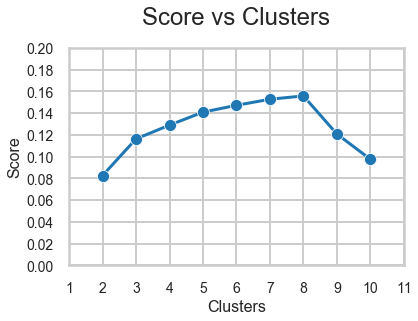

In [32]:
# find highest score, the number of clusters
# plot the scores vs # of clusters

print('Best Clusters:', df_ac.clusters.loc[df_ac.score.idxmax])
print('Best Score:', df_ac.score.max())

# plot the explained variance vs # of dimensions
_ = sns.lineplot(x='clusters', 
                 y='score', 
                 data=df_ac, 
                 marker='o')

_ = plt.title('Score vs Clusters', y=1.08)
_ = plt.xlabel('Clusters', fontsize=16)
_ = plt.ylabel('Score', fontsize=16)
_ = plt.xlim([1, 11])
_ = plt.ylim([0.0,0.12])
_ = plt.xticks([x for x in range(1, 12, 1)], fontsize = 14)
_ = plt.yticks([.0, .02, .04, .06, .08, .10, .12, .14, .16, .18, .20], fontsize = 14)

# DBSCAN
Parameters = Neighborhood size
Scalability = Very large n_samples, medium n_clusters
Use Case = Non-flat geometry, uneven cluster sizes
Geometry (metric used) = Distances between nearest points
Perform DBSCAN clustering from vector array or distance matrix. DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [33]:
# Use DBSCAN on x_cols

from sklearn.cluster import DBSCAN

# range of potential min samples
ls_ms = [x for x in range(1, 4, 1)]

# record min samples and score
ls_db = []

for ms in ls_ms:
    db = DBSCAN(min_samples=ms)
    labels = db.fit_predict(x_cols)
    score = silhouette_score(x_cols, labels, random_state=1)
    ls_db.append([ms, score])

df_db = pd.DataFrame(ls_db, columns=['min_samples', 'score'])    
df_db

,min_samples,score
0,1,0.190000
1,2,-0.021678
2,3,-0.106636


Best Min Samples: 1
Best Score: 0.19


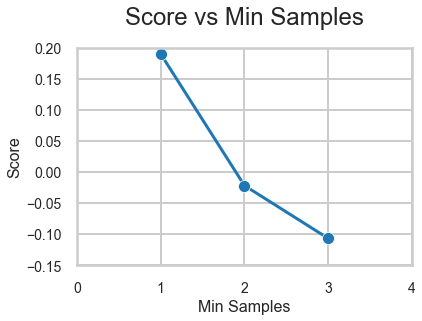

In [34]:
# find highest score, the min samples
# plot the scores vs min samples

print('Best Min Samples:', df_db.min_samples.loc[df_db.score.idxmax])
print('Best Score:', df_db.score.max())

# plot the explained variance vs # of dimensions
_ = sns.lineplot(x='min_samples', 
                 y='score', 
                 data=df_db, 
                 marker='o')

_ = plt.title('Score vs Min Samples', y=1.08)
_ = plt.xlabel('Min Samples', fontsize=16)
_ = plt.ylabel('Score', fontsize=16)
_ = plt.xlim([0, 4])
_ = plt.ylim([0.0,0.12])
_ = plt.xticks([0, 1, 2, 3, 4], fontsize = 14)
_ = plt.yticks([x/100 for x in range(-15, 21, 5)], fontsize = 14)

In [38]:
# Max Scores
print('AffinityPropagation:', df_ap.score.max())
print('SpectralClustering:', df_sc.score.max())
print('AgglomerativeClustering:', df_ac.score.max())
print('DBSCAN:', df_db.score.max())

AffinityPropagation: 0.12346523604478911
SpectralClustering: 0.10611539040197304
AgglomerativeClustering: 0.15578053718604024
DBSCAN: 0.19


Of the 4 algorithms, the DBSCAN had the highest score at 0.19. But that really isn't that high of a score. When the score is less than 0.25, "No substantial structure has been found". And with a minimum number of samples equal to 1, the model only accounts for the closest data point to assign it a label.